#### The MNIST dataset is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning.

#### There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset from  sickit learn 

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

### To change the target from text to integer

In [3]:
mnist.target = mnist.target.astype(np.int8)

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X = np.array(X)
y = np.array(y)
print('dimension of X = {}'.format(X.shape))
print('dimension of y = {}'.format(y.shape))

dimension of X = (70000, 784)
dimension of y = (70000,)


### Plot and arbitrary image number.

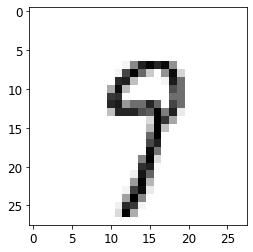

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[1500]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.show()

### Lets check the value with respect to this image. It looks like 9

In [7]:
y[1500]

9

### Split the data into train and test

### The training test is already shuffled for us ---> It guarantees that all cross validation folds will be similar.

### In case the data is not shuffled, the following command is usful:

In [8]:
# import numpy as np
# shuffle_index = np.random.permutation(60000)
# X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]    

In [9]:
np.random.permutation(60000)

array([12628, 37730, 39991, ...,   860, 15795, 56422])

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Traing a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example,
the number 9. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 9 and not-9.

In [11]:
y_train_9 = (y_train == 9) # True for all 9s, False for all other digits.
y_test_9 = (y_test == 9)

In [12]:
y_test_9

array([False, False, False, ..., False, False, False])

### SGDClassifier
A good place to start is with a Stochastic
Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier
has the advantage of being capable of handling very large datasets efficiently.
This is in part because SGD deals with training instances independently, one at a time
(which also makes SGD well suited for online learning), as we will see later.

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### To check how the classifier works 

In [14]:
# put a list of arraye
sgd_clf.predict([some_digit])

array([ True])

### Performance Measures

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train, y_train_9, cv=3, scoring='accuracy')

array([0.9456 , 0.95195, 0.9509 ])

### Lets check if these amazing resuls make sense :)

In [16]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train_9)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test_9)))

Unique predicted labels: [False]
Test score: 0.90


We obtained close to 90% accuracy without learning anything. This might seem striking,
but think about it for a minute. Imagine someone telling you their model is 90%
accurate. You might think they did a very good job. But depending on the problem,
that might be possible by just predicting one class. 

This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others).

### Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion
matrix.

### Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

     |████████████████████████████████| 542kB 9.3MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=3230c89a6b69dddcdab8d78710b31cd1db302f5f1adee098479307b7e9dac982
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


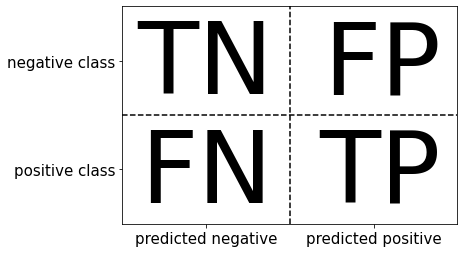

In [19]:
!pip install mglearn
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

### Confusion Matrix on the test set for the Dummy CLF

In [20]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test_9, pred_most_frequent)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[8991    0]
 [1009    0]]


### Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).

In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)

In [22]:
y_train_pred # An array of True and False

array([False, False, False, ..., False, False, False])

### The confusion matrix on training bins for the SGD CLF

In [23]:
confusion_matrix(y_train_9, y_train_pred)

array([[52715,  1336],
       [ 1695,  4254]])

### In a perfect condition we have:


In [24]:
y_train_perfect_predictions = y_train_9
confusion_matrix(y_train_9, y_train_perfect_predictions)

array([[54051,     0],
       [    0,  5949]])

Inspecting the full confusion matrix is a bit cumbersome, and while we gained a lot of insight from looking at all aspects of the matrix, the process was very manual and qualitative. There are several ways to summarize the information in the confusion matrix:

1- computing accuracy, which can be expressed as:
(TP+TN)/(TP+TN+FP+FN)

2- Precision = TP/(TP+FP)

3- Recall = TP/(TP+FN)

4- The harmonic mean of precision and recall: F = 2 * Precision * Recall/(Precison+Recall)

In [25]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_9, y_train_pred)

0.7610017889087657

In [26]:
4254/(4254+1336)

0.7610017889087657

In [27]:
recall_score(y_train_9, y_train_pred)

0.7150781643973777

In [28]:
4254/(4254+1695)

0.7150781643973777

In [29]:
from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred)

0.737325591472398

### Precision-Recall Trade off

### By inceresing the threshold, the precision increases (number of false posotives decrease, i.e., getting more pure) and the recall decreases (number of false negatives decrease).

### Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, and then make predictions based on those scores using any threshold you want:



In [30]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([454.40903078])

In [31]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [32]:
# Increasing the threshold:
threshold = 500
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

### The SGDClassifier uses a threshold equal to 0.

### So how can we decide which threshold to use? For this we will first need to get the scores of all instances in the training set using the cross_val_predict() function again, but this time specifying that we want it to return decision scores instead of predictions:

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3,method="decision_function")
y_scores # Return the scores that yields True and False 

array([-23009.36445429, -18436.99768895, -15940.48683084, ...,
       -30278.93992241, -28156.99780661,  -6860.27399688])

### With these scores we can compute precision and recall for all possible thresholds using the precision_recall_curve() function

In [35]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

Saving figure precision_recall_vs_threshold_plot


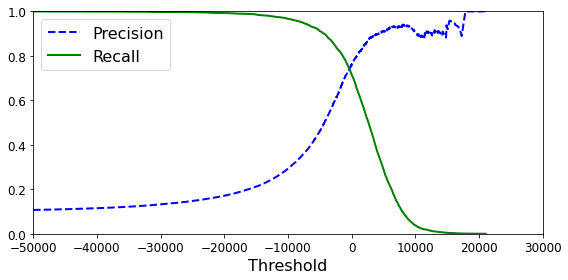

In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-50000, 30000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [37]:
thresholds

array([-52486.6904895 , -52483.5824911 , -52479.6675275 , ...,
        20225.53507163,  20552.95117091,  21027.68503262])

In [38]:
precisions

array([0.10595968, 0.10594375, 0.10594564, ..., 1.        , 1.        ,
       1.        ])

In [40]:
thresholds_90_precision = thresholds[np.argmax(precisions>0.9)]
thresholds_90_precision

4255.5613542876035

In [41]:
# 90% Precision
y_train_pred_90 = (y_scores >= thresholds_90_precision)

In [42]:
precision_score(y_train_9, y_train_pred_90)

0.9001728608470182

In [43]:
recall_score(y_train_9, y_train_pred_90)

0.3501428811564969

### It is fairly easy to create a classifier with virtually any precision we want: just set a high enough threshold.

### Plot Precision vs Recall

Saving figure precision_vs_recall_plot


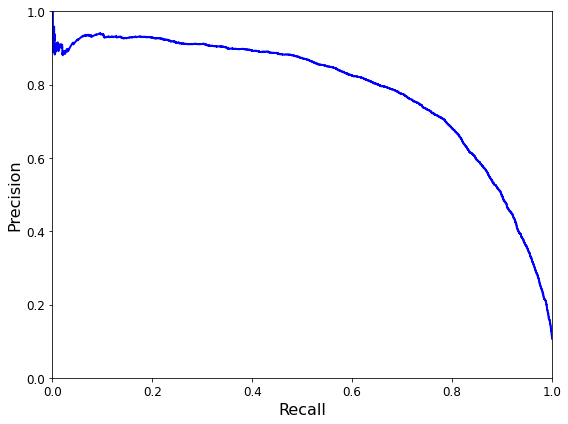

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

It seems that around 80 percent we have an acceptable recall as well. 

### ROC Curves

### Definitions

### ROC curve: TPR vs FPR

### TPR (True Positive Rate)(Sensitivity)(Recall) = TP/(TP+FN)

### FPR (False Positive Rate) the ratio of negative instances that are incorrectly classified as positive. 
### = 1-TNR = FP/(TN+FP)

### TNR = TN/(TN+FP) = Specifity


In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)

Saving figure roc_curve_plot


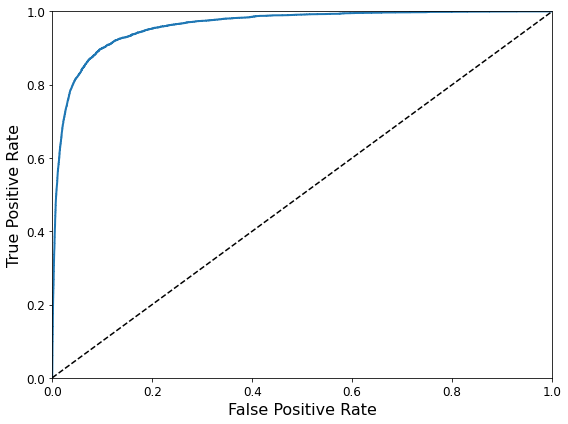

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

### The higher the recall (TPR), the more false positives (FPR) the classifier produces. A good classifier stays as far away from that line as possible (toward the top-left corner)

In [46]:
from sklearn.metrics import roc_auc_score

In [47]:
roc_auc_score(y_train_9, y_scores)

0.96114559368217

# Train a Random Forest Classifier

### The RandomForestClassifier class does not have a decision_function() method. Instead it has a predict_proba() method.

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state= 42)
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv=3,
method="predict_proba")

### To plot a ROC curve, we need scores, not probabilities. A simple solution is to use the positive class’s probability as the score.

In [ ]:
# The second element is the probability of the positive class.
y_proba_forest

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.95, 0.05],
       ...,
       [0.91, 0.09],
       [0.98, 0.02],
       [0.98, 0.02]])

In [49]:
y_scores_forest = y_proba_forest[:, 1] 

In [50]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_9,y_scores_forest)

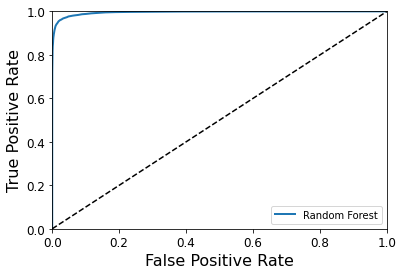

In [51]:
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="best")
plt.show()

### To plot both SGD and Random Forrest

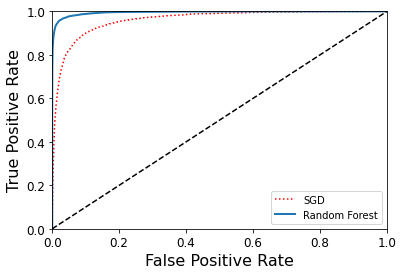

In [52]:
plt.plot(fpr, tpr, "r:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="best")
plt.show()


### The RandomForestClassifier’s ROC curve looks much better than the SGDClassifier’s.

In [53]:
roc_auc_score(y_train_9, y_scores_forest)

0.9952328942154235

### Calculate the Recall and Precision for the Random Forrest classifier

In [54]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv=3)

recall_score(y_train_9, y_train_pred_forest)

0.8404773911581779

In [56]:
precision_score(y_train_9, y_train_pred_forest)

0.9819324430479183

# Multiclass Classification

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also
called multinomial classifiers) can distinguish between more than two classes.

### 1- one-versus-all (OvA) strategy:
one way to create a system that can classify the digit images into 10
classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a
1-detector, a 2-detector, and so on). Then when you want to classify an image, you get
the decision score from each classifier for that image and you select the class whose
classifier outputs the highest score.

### 2- one-versus-one (OvO) strategy:
If there are N classes, you need to
train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45
binary classifiers! When you want to classify an image, you have to run the image
through all 45 classifiers and see which class wins the most duels. The main advantage
of OvO is that each classifier only needs to be trained on the part of the training
set for the two classes that it must distinguish.

### Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set, so for these algorithms OvO is preferred since it is faster to train many classifiers on small training sets than training few classifiers on large training sets.

### SGD Classifier

In [55]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([9], dtype=int8)

In [57]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-35309.05255708, -20528.66709235, -13296.3494342 ,
         -2541.46673774,  -6163.74656635,  -3029.38543399,
        -16208.23230499,  -6139.24883511,  -2694.24429202,
          1955.24306203]])

In [58]:
np.argmax(some_digit_scores)

9

In [59]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

### Support Vector Machine Classifier
#### Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO).

In [60]:
from sklearn.svm import SVC
svm_cls = SVC()
svm_cls.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
svm_cls.predict([some_digit])

array([9], dtype=int8)

In [62]:
some_digit_scores_svc = svm_cls.decision_function([some_digit])
some_digit_scores_svc

array([[-0.29818099,  2.75443752,  1.70600536,  5.24322993,  8.27092459,
         6.20988898,  0.70090549,  7.27483832,  4.02413208,  9.31106935]])

In [63]:
np.argmax(some_digit_scores_svc)

9

### OneVsOneClassifier or OneVsRestClassifier classes.

In [64]:
from sklearn.multiclass import OneVsOneClassifier


### OneVsOneClassifier using SGD algorithm

In [65]:
ovo_clf_sgd = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf_sgd.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [66]:
ovo_clf_sgd.predict([some_digit])

array([9], dtype=int8)

### OneVsOneClassifier using SVM algorithm

In [67]:
ovo_clf_svc = OneVsOneClassifier(SVC())
ovo_clf_svc.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   n_jobs=None)

In [68]:
ovo_clf_svc.predict([some_digit])

array([9], dtype=int8)

In [69]:
len(ovo_clf_svc.estimators_)

45

### Evaluate the SGDClassifier’s accuracy using the cross_val_score() function:

In [70]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [71]:
# It gets over 86% on all test folds.

### Increase the accuracy by scaling the inputs

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### Random Forest Classifier

In [73]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([9], dtype=int8)

In [74]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.  , 0.01, 0.01, 0.04, 0.  , 0.07, 0.01, 0.86]])

### The model estimates an 86% probability that the image represents a 9.

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 11]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 40], 'max_features': [2, 3, 4, 8, 11]},
  ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [76]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_features': 2, 'n_estimators': 3}
nan {'max_features': 2, 'n_estimators': 10}
nan {'max_features': 2, 'n_estimators': 30}
nan {'max_features': 4, 'n_estimators': 3}
nan {'max_features': 4, 'n_estimators': 10}
nan {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 10}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 11, 'n_estimators': 3}
nan {'max_features': 11, 'n_estimators': 10}
nan {'max_features': 11, 'n_estimators': 30}
nan {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
nan {'bootstrap': False, 'max_features': 2, 'n_estimators': 40}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 30}
nan {'bootstrap': False, 'm

In [77]:
import pandas as pd
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.422035,0.088964,0.065729,0.000671,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",0.77350,0.77090,0.77740,0.773933,0.002671,32,0.962100,0.961800,0.960625,0.961508,0.000637
1,0.749464,0.004239,0.137845,0.000360,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",0.90435,0.90120,0.90755,0.904367,0.002592,23,0.998925,0.998900,0.999175,0.999000,0.000124
2,1.895238,0.016536,0.359416,0.003178,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",0.94045,0.93980,0.94355,0.941267,0.001636,14,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.400485,0.002063,0.066409,0.001485,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",0.79630,0.79295,0.80605,0.798433,0.005557,31,0.965125,0.965500,0.966275,0.965633,0.000479
4,0.885266,0.000768,0.137854,0.001590,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",0.91370,0.91205,0.91755,0.914433,0.002304,22,0.999175,0.998875,0.999100,0.999050,0.000127
5,2.276264,0.003737,0.359960,0.009678,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",0.94670,0.94505,0.95005,0.947267,0.002080,13,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.448657,0.005383,0.064129,0.000547,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",0.81590,0.81150,0.81830,0.815233,0.002816,27,0.969950,0.967675,0.969325,0.968983,0.000960
7,1.056465,0.002747,0.132385,0.001291,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",0.92225,0.91835,0.92280,0.921133,0.001981,20,0.999200,0.999150,0.999150,0.999167,0.000024
8,2.781782,0.005160,0.343273,0.001772,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",0.95080,0.94865,0.95215,0.950533,0.001441,10,1.000000,1.000000,0.999950,0.999983,0.000024
9,0.577140,0.004803,0.062968,0.000264,11,3,NaN,"{'max_features': 11, 'n_estimators': 3}",0.83840,0.84160,0.83950,0.839833,0.001327,26,0.971575,0.974950,0.972925,0.973150,0.001387


In [78]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'bootstrap': False, 'max_features': 11, 'n_estimators': 40}


# Error Analysis

In [103]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

#### To plot the confusion matrix:

#### PLot of corrected values

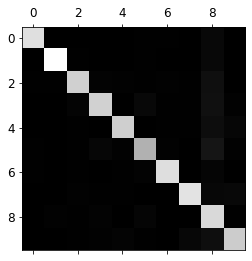

In [86]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### The most images are in the main diagonal which means most of the numbers were classified correctly.

In [99]:
conf_mx.max(1)

array([5577, 6400, 5220, 5227, 5182, 4444, 5552, 5684, 5429, 5107])

In [101]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#### Plot of Errors

Saving figure confusion_matrix_errors_plot


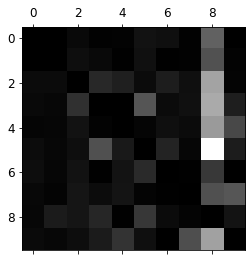

In [102]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Summary:

*   The rows represent actual classes, while columns represent predicted classes.
*   The column for classes 8 is quite bright, which means many images get misclassified as 8s.
*   However, the roe for class 8 is not that bad, meaning that actual 8s get properly classified. 
*   Some rows are pretty dark,such as row 1: this means that most 1s are classified correctly (a few are confused with 8s, but that’s about it).
*   3s and 5s often get confused.

*   A note about SGD classifier:
A simple SGDClassifier is a linear model. All it does is assign a
weight per class to each pixel, and when it sees a new image it just sums up the weighted pixel intensities to get a score for each class. Since 3s and 5s differ only by a few pixels, this model will easily confuse them.


